# Data cleaning

# Research question: 
Can you predict an App success based on its features from Google Play Store (success is defined as having a mean rating above 4.2 and at least 100 000 installs). Data set from Kaggel(web scraping).
https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
# importing packages
import math
import pdb
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# missing values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# we will drop all the missing values, for a quick analysis, then come back to it and address how to replace them (which method)
data.dropna(inplace = True)

In [8]:
data.shape

(9360, 13)

In [9]:
# we need to convert selected variables from object to float or int

In [10]:
# store a copy :
data= data.copy()

# number of Installs

In [11]:
# Feature Installs should be converted to an integer, the + and comas need to be removed

In [12]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [13]:
data['Installs']=data['Installs'].str.replace('Free','').str.replace('+','').str.replace(',','')

In [14]:
# convert Installs into an integer
data['Installs']=pd.to_numeric(data['Installs'], errors='coerce').astype(int)

In [15]:
data['Installs'].dtypes

dtype('int64')

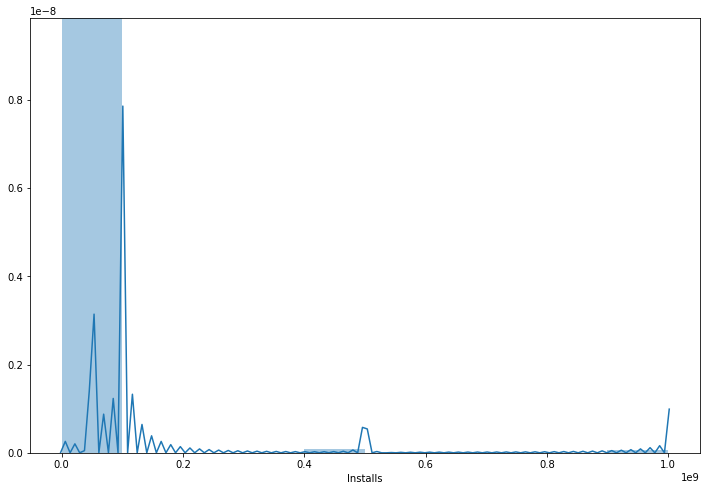

In [16]:
# Installs distribution
_=plt.figure(figsize=(12,8))
sns.distplot(data['Installs'], bins=10 )

Text(0.5, 1.0, "Number of 'Installs'")

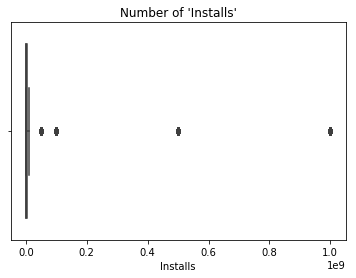

In [17]:
#vizualisation of outliers
_=sns.boxplot(data['Installs'])
plt.title("Number of 'Installs'")

box plots are non-parametric: they display variation in samples of a statistical population 
without making any assumptions of the underlying statistical distribution 

# App Size

In [18]:
# values size
#data['Size'].unique()

In [19]:
# Size in Megabytes:
# need to remove M and K from Size, use regular expressions https://docs.python.org/2/library/re.html,
# divide by 1000 if k
# replace "varies with device" with np.nan


In [20]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
# convert to float
data['Size'] = data['Size'].apply(lambda x: float(x))

In [21]:
#data['Size'].unique()

In [22]:
#select those rows that have a null value in the column Size
isnull_condition = (data['Size'].isnull())

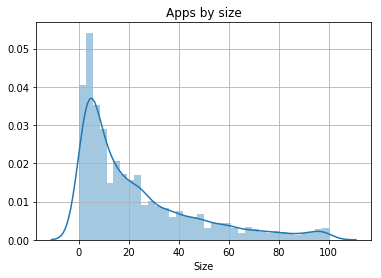

In [23]:
non_null_rating = data[~isnull_condition]['Size']
#vizualisation distribution of NON NULLs values of the feature Size
_=sns.distplot(non_null_rating)
plt.title("Apps by size")
plt.grid(True)

In [24]:
#  The feature Size has a right skewed distribution, the mean is greater than the median

In [25]:
# creata an array with no null values
size_array = data[data['Size']!=np.nan]['Size']

In [26]:
size_array

0        19.000
1        14.000
2         8.700
3        25.000
4         2.800
5         5.600
6        19.000
7        29.000
8        33.000
9         3.100
10       28.000
11       12.000
12       20.000
13       21.000
14       37.000
16        5.500
17       17.000
18       39.000
19       31.000
20       14.000
21       12.000
22        4.200
24       23.000
25        6.000
26       25.000
27        6.100
28        4.600
29        4.200
30        9.200
31        5.200
          ...  
10795     4.000
10796     7.800
10797    46.000
10799     6.800
10800    12.000
10801    19.000
10802    28.000
10803    81.000
10804    17.000
10805    15.000
10809    24.000
10810    21.000
10812    13.000
10814    31.000
10815     4.900
10817     8.000
10819     3.600
10820     8.600
10826       NaN
10827    13.000
10828    13.000
10829     7.400
10830     2.300
10832     0.582
10833     0.619
10834     2.600
10836    53.000
10837     3.600
10839       NaN
10840    19.000
Name: Size, Length: 9360

In [27]:
# replace NaN by median: create an array with the non null values and apply the mean

In [28]:
data['Size']=data['Size'].replace(np.nan,size_array.median())

In [29]:
# new size uniques (numeric, and no NaN)
#data['Size'].unique()

In [30]:
data['Size'].describe()
# without the NaNs , the median is 14 and the mean 21.4

count    9360.000000
mean       21.401585
std        21.571209
min         0.008500
25%         6.600000
50%        14.000000
75%        27.000000
max       100.000000
Name: Size, dtype: float64

Text(0.5, 1.0, 'Size App')

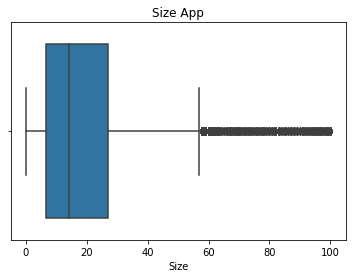

In [31]:
#vizualisation of outliers
_=sns.boxplot(data['Size'])
plt.title("Size App")

In [32]:
# Outliers detected above 55 Megabytes

# Feature Price 

In [33]:
# Price has dollars, need to be removed, and convert object into float

In [34]:
#data['Price'].unique()

In [35]:
# remove dollar from Price and store it in Price2
data['Price']= data['Price'].str.replace("$","")

In [36]:
#data['Price'].unique()

In [37]:
# convert object into float
data['Price'] = data['Price'].astype(float)
data['Price'].dtypes

dtype('float64')

In [38]:
# any nulls?
data['Price'].isna().sum()

0

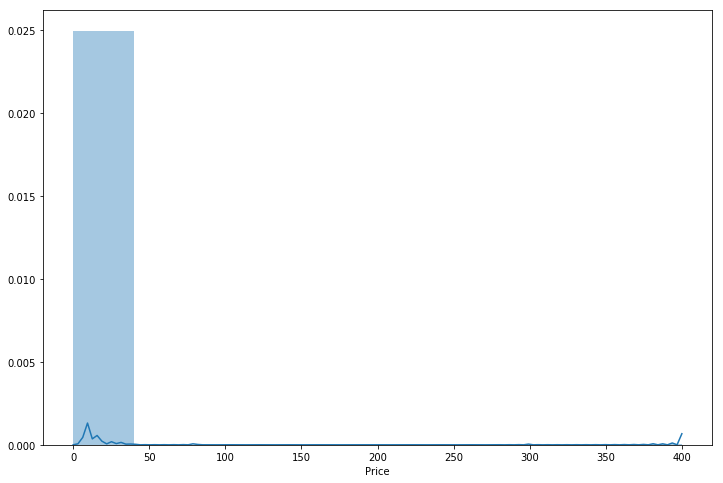

In [39]:
# Price distribution
_=plt.figure(figsize=(12,8))
sns.distplot(data['Price'], bins=10 )

Text(0.5, 1.0, 'Price App')

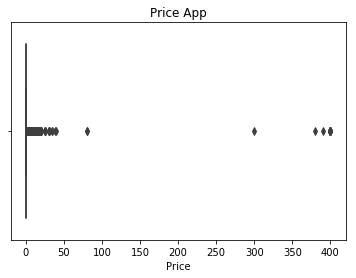

In [40]:
#vizualisation of outliers
_=sns.boxplot(data['Price'])
plt.title("Price App")

In [41]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [42]:
# visualise non nulls  
#select those rows that have a null value in the column Price
isnull_condition = (data['Price'].isna())

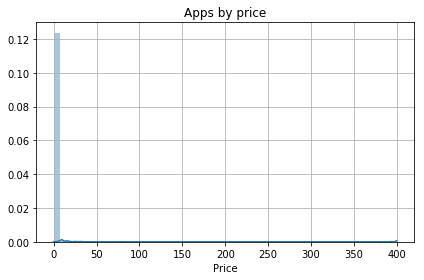

In [43]:
non_null_rating = data[~isnull_condition]['Price']
#vizualisation distribution of NON NULLs values in Price
_=sns.distplot(non_null_rating)
plt.title("Apps by price")
plt.grid(True)
plt.tight_layout()

Text(0.5, 1.0, 'Price App')

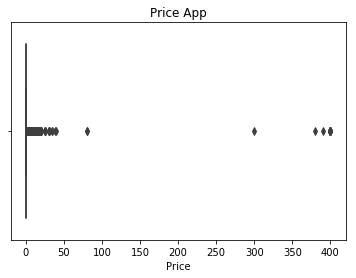

In [44]:
#vizualisation of outliers
_=sns.boxplot(non_null_rating)
plt.title("Price App")

In [45]:
# some Apps price are really high,close to 400 dollars, all related to finance (I am rich apps)

# Feature number of reviews per App

In [46]:
# Reviews
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [47]:
# convert object into float
data['Reviews'] = data['Reviews'].astype(int)

In [48]:
data['Reviews'].dtypes

dtype('int64')

In [49]:
data['Reviews'].describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

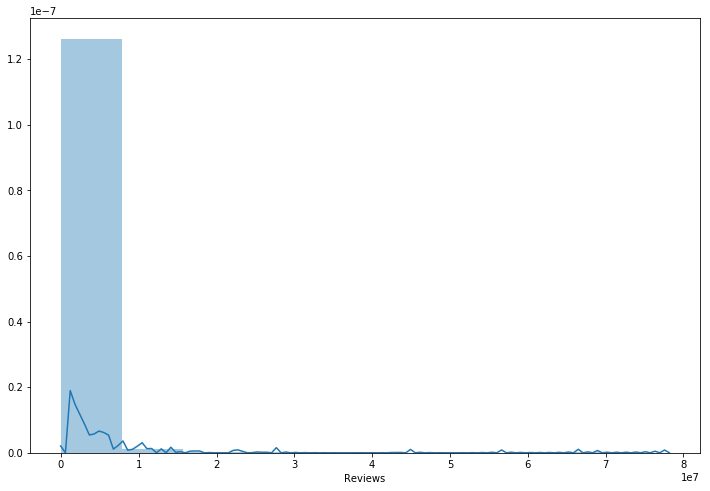

In [50]:
_=plt.figure(figsize=(12,8))
sns.distplot(data['Reviews'], bins=10 )

Text(0.5, 1.0, 'Number of reviews')

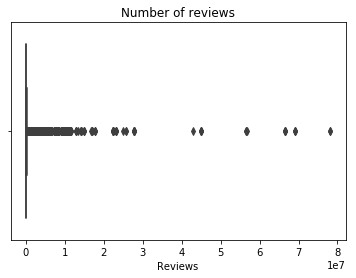

In [51]:
#vizualisation distribution of number of reviews values
_=sns.boxplot(data['Reviews'])
plt.title("Number of reviews")

In [52]:
# vizualise, once apply log to reviews

In [53]:
def transform_continuous_to_logarithmic_scale(series):
  # Transform to logarithmic scale
  return np.log(series)

In [54]:
data['Reviewslog']=transform_continuous_to_logarithmic_scale(data['Reviews'])

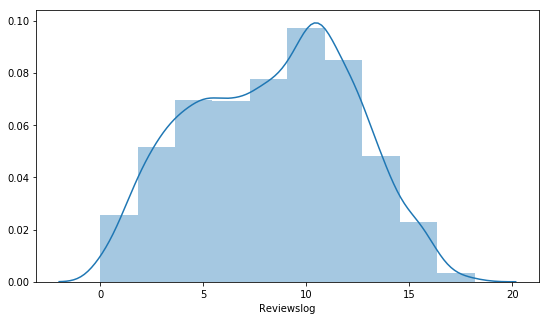

In [55]:
_=plt.figure(figsize=(9,5))
sns.distplot(data['Reviewslog'], bins=10 )

# Feature Rating: App's average rating

In [56]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [57]:
data['Rating'].describe()
# median and mean are close

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [58]:
#select those rows that have a null value in the column share
isnull_condition = (data['Rating'].isnull())

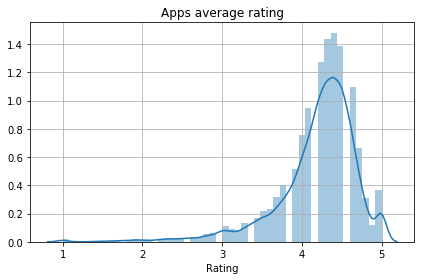

In [59]:
non_null_rating = data[~isnull_condition]['Rating']
#vizualisation distribution 0 of rating values
_=sns.distplot(non_null_rating)
plt.title("Apps average rating")
plt.grid(True)
plt.tight_layout()

In [60]:
rating_array = data[data['Rating']!=np.nan]['Rating']

In [61]:
# replace nan with mean rating
data['Rating']=data['Rating'].replace(np.nan,rating_array.mean())

In [62]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Text(0.5, 1.0, 'Apps by rating')

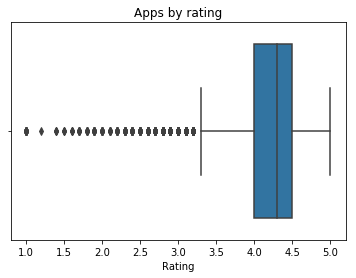

In [63]:
#vizualisation distribution of new ['Rating'] values
_=sns.boxplot(data['Rating'])
plt.title("Apps by rating")

# Feature Last Updated

In [64]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [65]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
data['day'] = pd.DatetimeIndex(data['Last Updated']).day
data['month'] = pd.DatetimeIndex(data['Last Updated']).month
data['year'] = pd.DatetimeIndex(data['Last Updated']).year
data['month_year'] = pd.to_datetime(data['Last Updated']).dt.to_period('M')

In [66]:
#data['month_year'].unique()

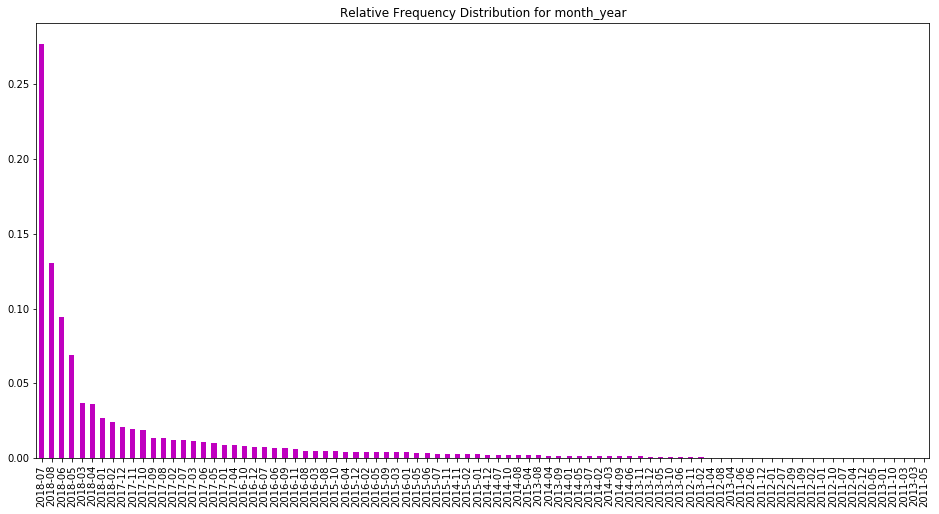

In [67]:
# Feature month_year
# Visualize frequencies of each value of 'month_year'
plt.figure(figsize=(16,8))
content_month_year = data['month_year']
relative_freqs_type = content_month_year.value_counts(normalize=True)
_=relative_freqs_type.plot(kind='bar', color='m')
_=plt.title('Relative Frequency Distribution for month_year')

In [ ]:
# Increasing trend over the years , peak month was July 2018

In [68]:
# Feature Current Version

In [69]:
# get the column and extract the first 2 digit and repetition + and return string, finadll returns a list
data['Current Ver_clean'] = data['Current Ver']\
                                    .apply(lambda x: re.findall('[0-9]+\.[0-9]+', 
                                                        str(x))[0] if re.findall('[0-9]+\.[0-9]+', 
                                                        str(x)) else -10000)

In [70]:
data['Current Ver_clean'] = data['Current Ver_clean'].astype(float)

In [71]:
#data['Current Ver_clean'].unique() 

In [72]:
data['Current Ver_clean'].describe()

count    9.360000e+03
mean    -1.306071e+03
std      1.410190e+04
min     -1.000000e+04
25%      1.000000e+00
50%      1.540000e+00
75%      3.200000e+00
max      1.000001e+06
Name: Current Ver_clean, dtype: float64

In [73]:
# create an array based on the current ver clean non nulls to look at the distribution
current_ver_clean_array = data[data['Current Ver_clean']>-10]['Current Ver_clean']

In [74]:
# replace nan by
data['Current Ver_clean']=data['Current Ver_clean'].replace(-10000,current_ver_clean_array.mean())

In [75]:
#data['Current Ver_clean'].unique()

Text(0.5, 1.0, 'Apps by current version number')

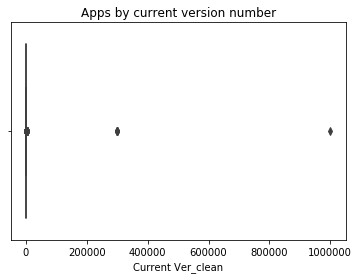

In [76]:
#vizualisation distribution of current ver clean non nulls values
_=sns.boxplot(current_ver_clean_array)
plt.title("Apps by current version number")

In [77]:
data['Current Ver_clean'].describe()

count    9.360000e+03
mean     4.461069e+02
std      1.355097e+04
min      0.000000e+00
25%      1.220000e+00
50%      2.430000e+00
75%      6.400000e+00
max      1.000001e+06
Name: Current Ver_clean, dtype: float64

# Feature Android Version

In [80]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [81]:
# replace varies with device
data['Android Ver']=data['Android Ver'].replace('Varies with device',np.nan)

In [ ]:
# remove and up
#keep first 2 digits convert to float

In [99]:
#data['Android Ver'].str.extract('(\d\.\d)', expand=True)

In [84]:
#store it
data['Android Ver']=data['Android Ver'].str.extract('(\d\.\d)', expand=True)

In [85]:
data['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', nan, '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '4.3', '2.0', '3.2', '5.1', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [86]:
# convert to float
data['Android Ver']=pd.to_numeric(data['Android Ver'])

In [87]:
data['Android Ver'].dtypes

dtype('float64')

In [88]:
data['Android Ver'].describe()

count    8041.000000
mean        3.869071
std         0.844801
min         1.000000
25%         4.000000
50%         4.100000
75%         4.200000
max         8.000000
Name: Android Ver, dtype: float64

In [89]:
# replace nan by mean
# create an array based on the current ver clean non nulls to look at the distribution
android_ver_clean_array = data[data['Android Ver']!=np.nan]['Android Ver']

Text(0.5, 1.0, 'Apps by android version')

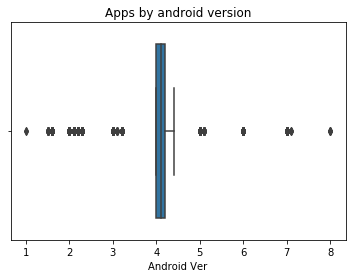

In [90]:
#vizualisation distribution of new ['Android ver'] values non nulls
_=sns.boxplot(android_ver_clean_array )
plt.title("Apps by android version")

In [91]:
# replace nan by mean
data['Android Ver']=data['Android Ver'].replace(np.nan,android_ver_clean_array.mean())

In [92]:
data['Android Ver'].describe()

count    9360.000000
mean        3.869071
std         0.783011
min         1.000000
25%         3.869071
50%         4.000000
75%         4.100000
max         8.000000
Name: Android Ver, dtype: float64

In [93]:
data['Android Ver'].unique()

array([4.        , 4.2       , 4.4       , 2.3       , 3.        ,
       4.1       , 3.86907101, 2.2       , 5.        , 6.        ,
       1.6       , 1.5       , 2.1       , 7.        , 4.3       ,
       2.        , 3.2       , 5.1       , 7.1       , 8.        ,
       3.1       , 1.        ])

In [94]:
data.shape

(9360, 19)

In [96]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviewslog,day,month,year,month_year,Current Ver_clean
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0,5.068904,7,1,2018,2018-01,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,6.874198,15,1,2018,2018-01,2.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0,11.379508,1,8,2018,2018-08,1.200000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,12.281384,8,6,2018,2018-06,446.106886
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,6.874198,20,6,2018,2018-06,1.100000


In [97]:
# before saving new csv double check data types for all
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 19 columns):
App                  9360 non-null object
Category             9360 non-null object
Rating               9360 non-null float64
Reviews              9360 non-null int64
Size                 9360 non-null float64
Installs             9360 non-null int64
Type                 9360 non-null object
Price                9360 non-null float64
Content Rating       9360 non-null object
Genres               9360 non-null object
Last Updated         9360 non-null object
Current Ver          9360 non-null object
Android Ver          9360 non-null float64
Reviewslog           9360 non-null float64
day                  9360 non-null int64
month                9360 non-null int64
year                 9360 non-null int64
month_year           9360 non-null period[M]
Current Ver_clean    9360 non-null float64
dtypes: float64(6), int64(5), object(7), period[M](1)
memory usage: 1.4+ MB


In [98]:
# Export data to my chosen folder
data.to_csv("/Users/AirMorena/Desktop/final_proj/csv/data_clean_with_outliers_090719.csv", index=False, encoding='utf-8')